# Анализ вакансий  для Аналитиков данных и специалистов Data Science с сайта HH.ru

# Описание и план проекта

Предстоит поработать с данными с сайта вакансий HH.ru

Доступны 2 датасета - вакансии Аналитиков данных и Дата-сайентистов.

**Цель проекта**: Выявить различия в предлагаемых вакансиях для Аналитиков данных и Дата-сайентистов.

**План проекта**: 
- загрузка данных
- предобработка данных;
- исследовательский анализ данных;
- определение наиболее желаемых кандидатов на вакансии;
- формулирование выводов и рекомендаций
- подготовка презентации

Ссылка на презентацию: https://disk.yandex.ru/i/rNB2OYegypWQug

## Загрузка данных

Импортируем библиотеки pandas, matplotlib, seaborn. Считаем данные из csv-файла, зададим цветовую палитру для графиков.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
from plotly import graph_objects as go
import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel6")
sns.despine() 

<Figure size 640x480 with 0 Axes>

In [2]:
path = 'C://Users//apolansky//Desktop//YP//Masterskaya//'
df_da = pd.read_excel(path + 'vacancies_da.xlsx')
df_ds = pd.read_excel(path + 'vacancies_ds.xlsx')
#df_da = pd.read_excel('C:\Users\apolansky\Desktop\YP\Masterskaya\vacancies_da.xlsx')

In [3]:
df_da.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN
3,100046788,Ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",Полный день,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация
4,100056244,Аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),['Документация'],Полный день,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,NaN,Документация


In [4]:
df_ds.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100049339,Стажер Data Science (Новосибирск),2024-05-24 10:44:01,https://hh.ru/vacancy/100049339,Открытая,СБЕР,Сбер для экспертов,Новосибирск,Junior (no experince),[],Полный день,Стажировка,sberseasons - оплачиваемая программа стажирово...,sberseasons оплачивать программа стажировка ра...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
1,100051447,Data Scientist,2024-05-24 10:58:18,https://hh.ru/vacancy/100051447,Открытая,Бюро кредитных историй Скоринг Бюро,NaN,Москва,Junior+ (1-3 years),"['Python', 'Hadoop', 'Machine Learning', 'Рабо...",Удаленная работа,Полная занятость,бюро кредитных историй «скоринг бюро» является...,бюро кредитный история скоринг бюро являться к...,NaN,NaN,ЗП не указана,"SQL, MS SQL, Big Data, Python, Spark, Hadoop, ...",Pandas,"Документация, Аналитическое мышление"
2,100070495,ML Engineer / Data Scientist,2024-05-24 13:15:26,https://hh.ru/vacancy/100070495,Открытая,ГК ФСК,NaN,Москва,Junior+ (1-3 years),"['Python', 'PyTorch', 'Machine Learning', 'Doc...",Полный день,Полная занятость,о компании и команде: группа компаний фск – мн...,компания команда группа компания фск многопроф...,NaN,NaN,ЗП не указана,"Python, PyTorch, ML, Docker, NLP, Pandas, SQL,...",NaN,NaN
3,100076648,Team Lead Data Science,2024-05-24 14:07:00,https://hh.ru/vacancy/100076648,Открытая,СБЕР,Сбер для экспертов,Москва,Middle (3-6 years),[],Полный день,Полная занятость,наша команда разрабатывает модели машинного об...,наш команда разрабатывать модель машинный обуч...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
4,100077910,Data Analyst / Data Scientist,2024-06-08 14:17:47,https://hh.ru/vacancy/100077910,Открытая,Итсен,NaN,Москва,Middle (3-6 years),"['DataLens', 'MS SQL', 'SQL', 'Spark', 'Аналит...",Полный день,Полная занятость,мы ищем талантливого middle data analyst / dat...,искать талантливый middle data analyst data sc...,350000.0,NaN,ЗП не указана,"Python, SQL, Обучение и развитие, Data Mining,...",NaN,Аналитическое мышление


**Описание данных**
В нашем распоряжении два датасета об активных вакансиях представленных на сайте HH.ru 24.05.2024 за последний месяц. Данные получены из API HH.ru.
Столбцы в обеих таблицах идентичны:
- id - Уникальный идентификатор вакансии.
- name - Название вакансии.
- published_at - Дата публикации.
- alternate_url - Ссылка на вакансию.
- type - Статус вакансии на момент получения данных от api и передачи их в базу.
- employer - Работодатель.
- department - Работодатель, отдел.
- area - Регион места работы.
- experience - Требуемый опыт работы.
- key_skills - Ключевые навыки, в том числе найденные при анализе полного текста вакансии. Поле генерируется после получения информации от api.
- schedule - График работы.
- employment - Тип занятости.
- description - Описание вакансии.
- description_lemmatized - Лемматизированное описание вакансии.
- salary_from - Нижняя граница предлагаемой заработной платы.
- salary_to - Верхняя граница предлагаемой заработной платы.
- salary_bin - Категория зарплаты.
- key_skills_from_key_skills_field - Ключевые навыки из поля вакансии key_skills.
- hard_skills_from_description - “Твердые” навыки, найденные при обработке полей с навыками. Поле генерируется после получения информации от api. soft_skills_from_description - “Мягкие” навыки, найденные при обработке полей с навыками. Поле генерируется после получения информации от api.

Выведем основную информацию о датафрейме с помощью метода info()

In [5]:
df_da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1801 non-null   int64         
 1   name                              1801 non-null   object        
 2   published_at                      1801 non-null   datetime64[ns]
 3   alternate_url                     1801 non-null   object        
 4   type                              1801 non-null   object        
 5   employer                          1801 non-null   object        
 6   department                        521 non-null    object        
 7   area                              1801 non-null   object        
 8   experience                        1801 non-null   object        
 9   key_skills                        1801 non-null   object        
 10  schedule                          1801 non-null 

In [6]:
df_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                974 non-null    int64         
 1   name                              974 non-null    object        
 2   published_at                      974 non-null    datetime64[ns]
 3   alternate_url                     974 non-null    object        
 4   type                              974 non-null    object        
 5   employer                          974 non-null    object        
 6   department                        413 non-null    object        
 7   area                              974 non-null    object        
 8   experience                        974 non-null    object        
 9   key_skills                        974 non-null    object        
 10  schedule                          974 non-null    

Зафиксируем начальное количество данных в переменную с помощью метода shape:

In [7]:
shape = df_da.shape
print('Кол-во строк :', shape[0])
print('Кол-во столбцов :', shape[1])

Кол-во строк : 1801
Кол-во столбцов : 20


In [8]:
shape = df_ds.shape
print('Кол-во строк :', shape[0])
print('Кол-во столбцов :', shape[1])

Кол-во строк : 974
Кол-во столбцов : 20


Мы получили информацию о датафрейме - кол-во строк, тип данных. Кол-во столбцов, название, тип данных в обоих датафреймах идентичны, поэтому можно объединить датафреймы, проставив для каждой таблицы дополнительный признак принадлежности к той или иной таблице.

Как видим, есть пропущенные значения в столбцах. Для анализа наиболее критичными будут пропуски в столбцах с данными о заработной плате и столбце Можно key_skills. Сейчас данные по зарплате имеют около 20% вакансий.

In [9]:
# Создаем переменные
df_da['name_type'] = 'da'
df_ds['name_type'] = 'ds'

# объеденяем таблицы
vacancies = pd.concat((df_da, df_ds))
total_shape = vacancies.shape[0]

Проверим кол-во строк и столбцов в объединенном датафрейме

In [10]:
shape = vacancies.shape
print('Кол-во строк :', shape[0])
print('Кол-во столбцов :', shape[1])

Кол-во строк : 2775
Кол-во столбцов : 21


Объединение прошло корректно.

# Поиск дубликатов

Теперь проверим датафрейм на наличие явных дубликатов.

In [11]:
vacancies.duplicated().sum()

0

Посмотрим какие вакансии встречаются в датасете

In [12]:
vacancies['name']=vacancies['name'].str.lower()


Посмотрим наличие дубликатов по id

In [13]:
dupl_id = vacancies.duplicated(subset='id').sum()
dupl_id

54

У нас 54 дубликата по id, посмотрим их

In [14]:
dupl_id_ds = df_ds.duplicated(subset='id').sum()
dupl_id_ds

0

In [15]:
dupl_id_da = df_da.duplicated(subset='id').sum()
dupl_id_da

0

При этом в датафреймах до объединения не было дубликатов, значит дублирование произошло во время объединения, следовательно одна и та же вакансия была и в датафрейме для DA и DS. Удалим такие вакансии.

In [16]:
#удаляем строки-дубликаты
vacancies=vacancies.drop_duplicates(subset='id')

In [17]:
print(f'Удалили {1 - vacancies.shape[0] / total_shape:.2%} данных')

Удалили 1.95% данных


Проверим есть ли у нас неявные дубликаты

In [18]:
vacancies.loc[:, 'published_date'] = vacancies.published_at.dt.date

In [19]:
vacancies[
    vacancies.duplicated(
        subset=['name', 'employer', 'department', 'area', 'description'],
        keep=False
    )].sort_values(by=['name', 'employer', 'published_date'])

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,name_type,published_date
1408,98088004,bi-аналитик/ аналитик данных,2024-05-12 17:09:30,https://hh.ru/vacancy/98088004,Открытая,Сэлвим,NaN,Москва,Junior+ (1-3 years),['Pandas'],...,обязанности: сбор бизнес-требований от внутре...,обязанность сбор бизнес требование внутренний ...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,da,2024-05-12
72,100463980,bi-аналитик/ аналитик данных,2024-06-09 10:00:29,https://hh.ru/vacancy/100463980,Открытая,Сэлвим,NaN,Москва,Junior+ (1-3 years),['Pandas'],...,обязанности: сбор бизнес-требований от внутре...,обязанность сбор бизнес требование внутренний ...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,da,2024-06-09
501,95520058,cпециалист по работе с данными (data scientist),2024-04-08 15:55:08,https://hh.ru/vacancy/95520058,Открытая,Открытый код,NaN,Самара,Junior+ (1-3 years),['Pandas'],...,"что нужно делать: анализ исходных данных, очи...",нужно делать анализ исходный данные очистка ау...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,ds,2024-04-08
10,100293732,cпециалист по работе с данными (data scientist),2024-06-10 11:49:46,https://hh.ru/vacancy/100293732,Открытая,Открытый код,NaN,Самара,Junior+ (1-3 years),['Pandas'],...,"что нужно делать: анализ исходных данных, очи...",нужно делать анализ исходный данные очистка ау...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,ds,2024-06-10
1273,97463573,data analyst,2024-04-19 18:45:38,https://hh.ru/vacancy/97463573,Открытая,Mayflower,NaN,Москва,Middle (3-6 years),"['Английский язык', 'Коммуникация', 'SQL', 'A/...",...,"work format: full time, officelocation: cyprus...",work format full time officelocation cyprus li...,NaN,NaN,ЗП не указана,"Python, A/B тесты, Big Data, Data Analysis, Ta...",Юнит-экономика,"Коммуникация, Критическое мышление",da,2024-04-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,95613788,эконометрист / data scientist,2024-03-27 13:03:38,https://hh.ru/vacancy/95613788,Открытая,Okkam,NaN,Москва,Middle (3-6 years),"['Pandas', 'Коммуникация']",...,привет!мы - коммуникационная группа okkam. наш...,привет коммуникационный группа okkam наш специ...,NaN,NaN,ЗП не указана,NaN,Pandas,Коммуникация,ds,2024-03-27
805,97991099,эконометрист / data scientist,2024-04-26 13:19:13,https://hh.ru/vacancy/97991099,Открытая,Okkam,NaN,Москва,Middle (3-6 years),"['Pandas', 'Коммуникация']",...,привет!мы - коммуникационная группа okkam. наш...,привет коммуникационный группа okkam наш специ...,NaN,NaN,ЗП не указана,NaN,Pandas,Коммуникация,ds,2024-04-26
11,100296110,эконометрист / data scientist,2024-05-27 08:31:02,https://hh.ru/vacancy/100296110,Открытая,Okkam,NaN,Москва,Middle (3-6 years),"['Pandas', 'Коммуникация']",...,привет!мы - коммуникационная группа okkam. наш...,привет коммуникационный группа okkam наш специ...,NaN,NaN,ЗП не указана,NaN,Pandas,Коммуникация,ds,2024-05-27
1302,97652565,эксперт-аналитик данных в группу цифрового аудита,2024-04-22 18:24:19,https://hh.ru/vacancy/97652565,Открытая,Recruitment Boutique S.M.Art,NaN,Москва,Junior+ (1-3 years),"['Аудит', 'Python', 'MS SQL']",...,ищем эксперта со знанием инструментов анализа ...,искать эксперт знание инструмент анализ данные...,NaN,NaN,ЗП не указана,"Аудит, MS SQL, Python",NaN,NaN,da,2024-04-22


Более 20% вакансий - неявные дубликаты по наименованию компании, наименованию вакансии, но зачастую они имеют разную дату размещения вакансии. Такие дубликаты удалять не будем, т.к. одна и таже вакансия от одной и той же компании может быть размещена несколько раз по разным причинам:
- от разных рекрутеров (например, при использовании доп.ресурса кадрового агенства)
- при различных обстоятельствах при прохождении соискателя по воронке подбора (например, соискатель отказался на последнем этапе)
- внутренние процессы компании, связанные с подбором
   

# Поиск аномальных значений

Посмотрим минимальные и максимальные даты

In [20]:
print(vacancies['published_date'].min())
print(vacancies['published_date'].max())

2024-02-13
2024-06-11


Расчет помесячной динамики количества вакансий

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

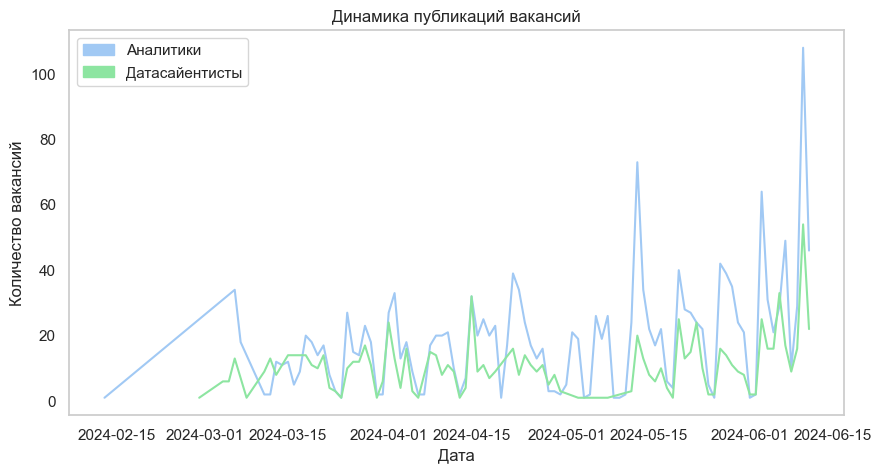

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))

# получаем данные для графиков
df = vacancies.groupby(['name_type', 'published_date'], as_index=False).id.count()

# отрисовываем графики
sns.lineplot(df[df.name_type == 'da'], x='published_date', y='id', ax=ax)
sns.lineplot(df[df.name_type == 'ds'], x='published_date', y='id', ax=ax)

# Добавляем названия
plt.title('Динамика публикаций вакансий', fontsize=12)
plt.xlabel('Дата')
plt.ylabel('Количество вакансий')
plt.grid(False)
# добавляем легенду
analyst_patch = mpatches.Patch(color = '#a1c9f4', label='Aналитики')
datascience_patch = mpatches.Patch(color = '#8de5a1',label='Датасайентисты')
plt.legend(handles=[analyst_patch, datascience_patch])

plt.savefig('dinamica.png')

# выводим график
plt.show()

Наблюдается некоторый рост числа вакансий в конце периода, скорее всего он связан с актуальностью размещенных вакансий. С учетом того, что вероятность закрытия вакансии увеличивается с течением времени после ее публикации, текущие данные не позволяют точно оценить динамику изменения количества вакансий.

Посмотрим какие регионы присутствуют в нашем датасете

In [22]:
display(vacancies.groupby('area')['name_type'].count().sort_values(ascending=False).head(20))

area
Москва                          1975
Санкт-Петербург                  264
Екатеринбург                      68
Новосибирск                       56
Нижний Новгород                   50
Казань                            40
Владивосток                       31
Краснодар                         27
Самара                            16
Ростов-на-Дону                    12
Пермь                             12
Челябинск                         12
Воронеж                           11
Тюмень                            11
Томск                             11
Ижевск                             7
Владимир                           7
Красноярск                         6
Адыгейск                           6
Иваново (Ивановская область)       5
Name: name_type, dtype: int64

Основная часть вакансий 

In [23]:
# отфильтруем данные, сгруппируем по категориям и посчитаем
df_loc_count = vacancies.groupby('area')[['name_type']].count()
# переименуем столбец
df_loc_count.columns = ['total_count']
df_loc_count['share']=(df_loc_count['total_count']/df_loc_count['total_count'].sum()*100).round(0)
df_loc_count = df_loc_count.reset_index().sort_values(by='total_count', ascending=False)
display(df_loc_count)

,area,total_count,share
34,Москва,1975,73.0
50,Санкт-Петербург,264,10.0
17,Екатеринбург,68,2.0
39,Новосибирск,56,2.0
38,Нижний Новгород,50,2.0
...,...,...,...
1,Алтайское,1,0.0
40,Одинцово,1,0.0
42,Оренбург,1,0.0
44,Подольск (Московская область),1,0.0


Посмотрим значения в переменной experience

In [24]:
vacancies['experience'].value_counts()

experience
Junior+ (1-3 years)      1496
Middle (3-6 years)        996
Junior (no experince)     185
Senior (6+ years)          44
Name: count, dtype: int64

Больше всего вакансий для Junior+ (1-3 years) 

Посмотрим какие значения принимает переменная schedule(график работы)

In [25]:
vacancies['schedule'].value_counts()

schedule
Полный день         2116
Удаленная работа     511
Гибкий график         80
Сменный график        14
Name: count, dtype: int64

Посмотрим какие значения принимает переменная employment

In [26]:
vacancies['employment'].value_counts()

employment
Полная занятость       2653
Стажировка               35
Частичная занятость      23
Проектная работа         10
Name: count, dtype: int64

In [27]:
vacancies.reset_index(drop=True, inplace=True)

Далее посмотрим на столбец с указанием зарплат. Создадим новый категорийный столбец с зарплатой, где зарплата - это среднее между верхним и нижним зарплатным порогом, если указаны оба значения.  Если указано только одно из значений, то мспользуем известное значение.

In [28]:
def calc_salary_avg(row: pd.Series) -> float:
# Проверяем, указаны ли оба порога зарплаты, и если да, возвращаем их среднее
    if not row.isna()['salary_to'] and not row.isna()['salary_from']:
        return (row['salary_to'] + row['salary_from']) / 2
    
    # Возвращаем верхний порог зарплаты, если он указан
    if not row.isna()['salary_to']:
        return row['salary_to']
    
    # Возвращаем нижний порог зарплаты, если он указан
    if not row.isna()['salary_from']:
        return row['salary_from']

In [29]:
vacancies['salary_avg'] = vacancies.apply(calc_salary_avg, axis=1)

Посмотрим какие значения принимает переменная salary_bin

In [30]:
vacancies['salary_bin'].value_counts()

salary_bin
ЗП не указана                2420
От 100 тысяч до 200 тысяч     108
Меньше 100 тысяч               74
Больше 300 тысяч               67
От 200 тысяч до 300 тысяч      52
Name: count, dtype: int64

Попробуем заполнить значения средней ЗП из столбца salary_num, если в столбце salary_bin "ЗП не указана"

In [31]:
def calc_salary_bin(row: pd.Series) -> str:
        # Проверяем отсутствие данных о зарплате
    if row.isna()['salary_avg']:
        return 'ЗП не указана'
    
    # Категоризируем зарплату
    else:
        if row['salary_avg'] > 300000:
            return 'Больше 300 тысяч'
        if row['salary_avg'] > 200000:
            return 'От 200 тысяч до 300 тысяч'
        if row['salary_avg'] > 100000:
            return 'От 100 тысяч до 200 тысяч'
        else:
            return 'Меньше 100 тысяч'

In [32]:
vacancies['calc_salary_bin'] = vacancies.apply(calc_salary_bin, axis=1)

In [33]:
vacancies.head(10)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,name_type,published_date,salary_avg,calc_salary_bin
0,100039284,junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,da,2024-05-24,60000.0,Меньше 100 тысяч
1,100039480,аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN,da,2024-05-24,NaN,ЗП не указана
2,100042705,аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",...,90000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN,da,2024-05-24,90000.0,Меньше 100 тысяч
3,100046788,ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация,da,2024-05-24,NaN,ЗП не указана
4,100056244,аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),['Документация'],...,NaN,NaN,ЗП не указана,NaN,NaN,Документация,da,2024-05-24,NaN,ЗП не указана
5,100059110,senior data analyst (цифровой билайн),2024-06-11 11:45:29,https://hh.ru/vacancy/100059110,Открытая,билайн,"билайн: ИТ, Data, Digital",Москва,Middle (3-6 years),"['Python', 'SQL', 'Математическая статистика']",...,NaN,NaN,ЗП не указана,"Python, SQL, Математическая статистика",NaN,NaN,da,2024-06-11,NaN,ЗП не указана
6,100060772,аналитик данных,2024-05-24 11:56:20,https://hh.ru/vacancy/100060772,Открытая,ГКУ Центр занятости населения города Москвы,NaN,Москва,Junior+ (1-3 years),[],...,100000.0,NaN,ЗП не указана,NaN,NaN,NaN,da,2024-05-24,100000.0,Меньше 100 тысяч
7,100069131,дата аналитик,2024-05-24 13:05:01,https://hh.ru/vacancy/100069131,Открытая,СБЕР,Сбер для экспертов,Санкт-Петербург,Junior+ (1-3 years),"['Документация', 'Проактивность', 'Коммуникация']",...,NaN,NaN,ЗП не указана,NaN,NaN,"Коммуникация, Документация, Проактивность",da,2024-05-24,NaN,ЗП не указана
8,100069821,аналитик данных,2024-06-10 16:49:49,https://hh.ru/vacancy/100069821,Открытая,МТС,«МТС»,Казань,Junior+ (1-3 years),[],...,72000.0,NaN,ЗП не указана,NaN,NaN,NaN,da,2024-06-10,72000.0,Меньше 100 тысяч
9,100071014,аналитик данных,2024-06-07 11:08:22,https://hh.ru/vacancy/100071014,Открытая,Россети Урал,NaN,Екатеринбург,Junior+ (1-3 years),['Аналитическое мышление'],...,51000.0,NaN,ЗП не указана,NaN,NaN,Аналитическое мышление,da,2024-06-07,51000.0,Меньше 100 тысяч


Как видим, в расчетном столбце появились значения о зарплате, даже если ранее в столбце "salary_bin" информация о заработной плате отсутствовала.

Посмотрим распределение заработной платы

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


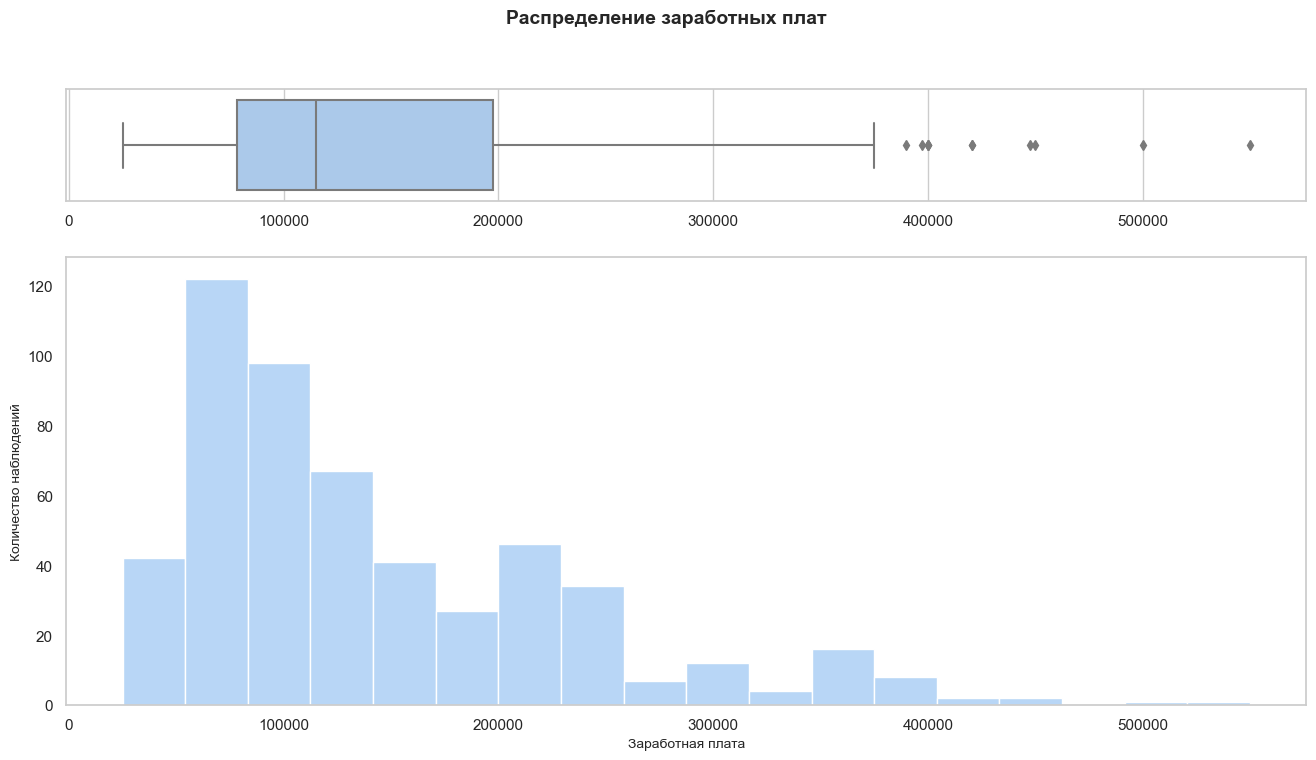

In [34]:
fig, axes = plt.subplots(
    nrows=2, ncols=1, sharex=False, 
    gridspec_kw={"height_ratios": (.2, .8)},
    figsize=(16, 8)
)
sns.boxplot(data=vacancies, x='salary_avg', ax=axes[0], orient='h')
sns.histplot(data=vacancies, x='salary_avg')
axes[0].set_xlabel('')
axes[1].set_ylabel('Количество наблюдений', fontsize=10)
axes[1].set_xlabel('Заработная плата', fontsize=10)

fig.suptitle('Распределение заработных плат', 
            fontsize=14,
            fontweight="bold",
)
plt.grid(False)
plt.show()

Видно, что медианная зарплата немного больше 100 т.р.

Теперь проанализируем софт и хард скиллы.

Создадим переменную skills - так называемый "мешок слов", в котором мы найдем самые популярные скиллы.
Немного почистим наш лист с навыками. Близкие по названию навыки приведем к единому написанию - например, 'powerbi' и 'power bi', уберем приставку ms у excel.
Можно заметить, что хард скиллы часто пигутся на английском, поэтому мы можем разделить в дальнейшем скиллы по этому признаку. Для этого хард скиллы пропишем на английском, тем более это написание часто встречается. Для выявления топ скиллов этого достаточно.

In [35]:
#Создаем новую колонку 'skills_from_key_skills' в DataFrame 'vacancies'
# В этой колонке для каждой вакансии будет храниться уникальный набор навыков,
# приведенный к нижнему регистру
vacancies['skills_from_key_skills'] = (
    vacancies['key_skills'].map(
        lambda x: ', '.join(set([skill[1:-1] for skill in x[1:-1].lower().split(', ')])))
)
# заменим в скиллах 
vacancies['skills_from_key_skills']=vacancies['skills_from_key_skills'].str.replace(r'\bms excel\b', 'excel,', regex=True)
vacancies['skills_from_key_skills']=vacancies['skills_from_key_skills'].str.replace(r'\bсводные таблицы\b', 'excel', regex=True)
vacancies['skills_from_key_skills']=vacancies['skills_from_key_skills'].str.replace(r'\bанализ данных\b', 'data analysis', regex=True)
vacancies['skills_from_key_skills']=vacancies['skills_from_key_skills'].str.replace(r'\bмашинное обучение\b', 'machine learning', regex=True)
vacancies['skills_from_key_skills']=vacancies['skills_from_key_skills'].str.replace(r'\bml\b', 'machine learning', regex=True)
vacancies['skills_from_key_skills']=vacancies['skills_from_key_skills'].str.replace(r'\b, powerbi,\b', ', power bi,', regex=True)
vacancies['skills_from_key_skills']=vacancies['skills_from_key_skills'].str.replace(r'\b, bi,\b', ', power bi,', regex=True)
vacancies['skills_from_key_skills']=vacancies['skills_from_key_skills'].str.replace(r'\bработа с большим объемом информации\b', 'data base', regex=True)
vacancies['skills_from_key_skills']=vacancies['skills_from_key_skills'].str.replace(r'\bбазы данных\b', 'data base', regex=True)
vacancies['skills_from_key_skills']=vacancies['skills_from_key_skills'].str.replace(r'\bdata science\b', 'data base', regex=True)
vacancies['skills_from_key_skills']=vacancies['skills_from_key_skills'].str.replace(r'\bработа с базами данных\b', 'data base', regex=True)
vacancies['skills_from_key_skills']=vacancies['skills_from_key_skills'].str.replace(r'\bаналитика\b', 'data analysis', regex=True)
vacancies['skills_from_key_skills']=vacancies['skills_from_key_skills'].str.replace(r'\bаналитический склад ума\b', 'аналитическое мышление', regex=True)
vacancies['skills_from_key_skills']=vacancies['skills_from_key_skills'].str.replace(r'\bматематическая статистика\b', 'statistics', regex=True)
vacancies['skills_from_key_skills']=vacancies['skills_from_key_skills'].str.replace(r'\bматематический анализ\b', 'statistics', regex=True)
vacancies['skills_from_key_skills']=vacancies['skills_from_key_skills'].str.replace(r'\bстатистика\b', 'statistics', regex=True)
vacancies['skills_from_key_skills']=vacancies['skills_from_key_skills'].str.replace(r'\bстатистический анализ\b', 'statistics', regex=True)
vacancies['skills_from_key_skills']=vacancies['skills_from_key_skills'].str.replace(r'\bюнит-экономика\b', 'unit economics', regex=True)
vacancies['skills_from_key_skills']=vacancies['skills_from_key_skills'].str.replace(r'\ba/b тесты\b', 'a/b test', regex=True)
vacancies['skills_from_key_skills']=vacancies['skills_from_key_skills'].str.replace(r'\bанглийский язык\b', 'english', regex=True)
vacancies['skills_from_key_skills']=vacancies['skills_from_key_skills'].str.replace(r'\b, анализ,\b', ', statistics,', regex=True)
vacancies['skills_from_key_skills']=vacancies['skills_from_key_skills'].str.replace(r'\bматематическое моделирование\b', 'math modeling', regex=True)
vacancies['skills_from_key_skills']=vacancies['skills_from_key_skills'].str.replace(r'\bаналитические исследования\b', 'researh', regex=True)
vacancies['skills_from_key_skills']=vacancies['skills_from_key_skills'].str.replace(r'\bанализ бизнес-показателей\b', 'business analytics', regex=True)
vacancies['skills_from_key_skills']=vacancies['skills_from_key_skills'].str.replace(r'\bанализ бизнес показателей\b', 'business analytics', regex=True)
vacancies['skills_from_key_skills']=vacancies['skills_from_key_skills'].str.replace(r'\bбизнес-анализ\b', 'business analytics', regex=True)
vacancies['skills_from_key_skills']=vacancies['skills_from_key_skills'].str.replace(r'\bпрогнозирование\b', 'forecast', regex=True)

# Преобразуем колонку 'skills_from_key_skills' в список для дальнейшей обработки
skills_data = vacancies['skills_from_key_skills'].to_list()

# Инициализируем словарь для подсчета частоты встречаемости каждого навыка
counter = {}
# перебираем навыки в списке 'skills_data'
for sequence in skills_data:
    # Разделяем строку с навыками на уникальные элементы и преобразуем в множество
    skills = set(sequence.split(', '))
    # Подсчитываем количество вхождений каждого навыка
    for skill in skills:
        counter[skill] = counter.get(skill, 0) + 1

# Фильтруем словарь 'counter', оставляя только те навыки, которые встречаются более 20 раз
counter = {k: v for k, v in counter.items() if v > 20}

# Сортируем словарь 'counter' по убыванию частоты встречаемости навыков
counter = dict(sorted(counter.items(), key=lambda item: item[1], reverse=True))

Посмотрим на словарь скиллов который у нас получился и кол-во посчитанных значений.

In [36]:
counter

{'sql': 1006,
 'python': 993,
 'pandas': 656,
 'data analysis': 619,
 '': 536,
 'data base': 488,
 'документация': 433,
 'аналитическое мышление': 415,
 'коммуникация': 286,
 'machine learning': 264,
 'statistics': 260,
 'power bi': 230,
 'excel,': 209,
 'confluence': 190,
 'ms sql': 146,
 'big data': 119,
 'researh': 114,
 'postgresql': 113,
 'business analytics': 112,
 'unit economics': 99,
 'сбор и анализ информации': 98,
 'tableau': 94,
 'pytorch': 82,
 'hadoop': 77,
 'spark': 77,
 'nlp': 77,
 'numpy': 75,
 'english': 72,
 'a/b test': 71,
 'git': 70,
 'проактивность': 66,
 'excel': 65,
 'etl': 64,
 'forecast': 63,
 'ms powerpoint': 63,
 'clickhouse': 62,
 'math modeling': 56,
 'airflow': 53,
 'docker': 45,
 'linux': 40,
 'работа в команде': 40,
 'dwh': 39,
 'ms power bi': 36,
 'vba': 32,
 'подготовка презентаций': 32,
 'deep learning': 31,
 'tensorflow': 30,
 'креативность': 28,
 'power query': 28,
 'деловая коммуникация': 27,
 'data mining': 27,
 'bi': 27,
 'визуализация данных': 

Для аналитиков и датасайентистов одни из самых популярных скиллов: sql, python (+pandas), power bi, excel

Выделим в список основные скиллы и дадим им признак - хард или софт.

In [37]:
# извлечем скиллы из списков
def extract_skills(skill_list):
    if pd.isna(skill_list):
        return '', ''
    hard_skills = []
    soft_skills = []
    for skill in skill_list.split(','):
        skill = skill.strip()
        if skill:
            if skill.isascii():
                hard_skills.append(skill)
            else:
                soft_skills.append(skill)
    return ', '.join(hard_skills), ', '.join(soft_skills)

# Применим функцию к столбцу с ключевыми скилами приведенные к нижнему регистру
vacancies[['hard_skills', 'soft_skills']] = vacancies['skills_from_key_skills'].apply(extract_skills).apply(pd.Series)


Разделим навыки из столбца skills_from_key_skills на хард и софт навыки, получим 2 столбца soft_skills и hard_skills:

In [38]:
vacancies['hard_skills'] = vacancies['hard_skills'].replace('', 'нет данных')
vacancies['soft_skills'] = vacancies['soft_skills'].replace('', 'нет данных')

In [39]:
experience_levels = vacancies['experience'].unique()
type=vacancies['name_type'].unique()

# Функция для определения топ-N наиболее важных навыков
def find_top_skills(vacancies, skill_column, n):
    # Объединение списков всех навыков для каждой строки
    all_skills = ','.join(vacancies[skill_column].dropna()).split(',')
    # Убираем значения "нет данных"
    all_skills = [skill.strip() for skill in all_skills if skill.lower() not in ['нет данных']]
    # Создание Series из списка навыков и их количества
    skill_counts = pd.Series(all_skills).value_counts()
    
    # Вывод топ-N наиболее часто встречающихся навыков
    print(skill_counts.head(n))

# Для каждого уровня грейда и вакансии Аналитик данных по скиллам
for level in experience_levels:
    print(f"Топ-5 наиболее важных hard skills для грейда {level} (Аналитик данных):")
    find_top_skills((vacancies[(vacancies['experience'] == level)&(vacancies['name_type'] == 'da')]), 'hard_skills', 5)
    print(f"Топ-5 наиболее важных soft_skills для грейда {level} (Аналитик данных):")
    find_top_skills((vacancies[(vacancies['experience'] == level)&(vacancies['name_type'] == 'da')]), 'soft_skills', 5)
    print("\n" + "="*50 + "\n")

Топ-5 наиболее важных hard skills для грейда Junior (no experince) (Аналитик данных):
data analysis    44
data base        43
sql              37
python           34
excel            34
Name: count, dtype: int64
Топ-5 наиболее важных soft_skills для грейда Junior (no experince) (Аналитик данных):
аналитическое мышление      42
документация                17
коммуникация                17
сбор и анализ информации     8
проактивность                6
Name: count, dtype: int64


Топ-5 наиболее важных hard skills для грейда Junior+ (1-3 years) (Аналитик данных):
sql              469
data analysis    441
python           320
data base        320
excel            178
Name: count, dtype: int64
Топ-5 наиболее важных soft_skills для грейда Junior+ (1-3 years) (Аналитик данных):
аналитическое мышление      258
документация                150
коммуникация                105
сбор и анализ информации     64
проактивность                29
Name: count, dtype: int64


Топ-5 наиболее важных hard skill

In [40]:
# Для каждого уровня грейда и вакансии Дата сайентист
for level in experience_levels:
    print(f"Топ-5 наиболее важных hard skills для грейда {level} (Дата сайентист):")
    find_top_skills((vacancies[(vacancies['experience'] == level)&(vacancies['name_type'] == 'ds')]), 'hard_skills', 5)
    print(f"Топ-5 наиболее важных soft_skills для грейда {level} (Дата сайентист):")
    find_top_skills((vacancies[(vacancies['experience'] == level)&(vacancies['name_type'] == 'ds')]), 'soft_skills', 5)
    print("\n" + "="*50 + "\n")

Топ-5 наиболее важных hard skills для грейда Junior (no experince) (Дата сайентист):
python              16
machine learning    14
statistics           9
data mining          7
pandas               7
Name: count, dtype: int64
Топ-5 наиболее важных soft_skills для грейда Junior (no experince) (Дата сайентист):
документация                       4
аналитическое мышление             3
разработка поисковых технологий    2
коммуникация                       1
проактивность                      1
Name: count, dtype: int64


Топ-5 наиболее важных hard skills для грейда Junior+ (1-3 years) (Дата сайентист):
python              185
pandas              178
machine learning    131
sql                 128
statistics           77
Name: count, dtype: int64
Топ-5 наиболее важных soft_skills для грейда Junior+ (1-3 years) (Дата сайентист):
документация              57
коммуникация              42
аналитическое мышление    23
работа в команде           7
умение планировать         6
Name: count, dtype:

Разделение навыковв происходите неидеально, но для определения основных навыков и тенденции вполне подходит.


Вывод по предобработке данных:

В процессе предобработки данных были проведены следующие действия:
- Объединены 2 датафрейма с вакансиями для удобства анализа, при этом добавлен столбец, в котором появился признак к какой вакансии относится запись (DA/DS)
- Удалены дубликаты, возникшие при объединении датафреймов.
- Скиллы распределены на хард и софт скиллы. Произведена замена близких по значению скиллов.
- Создана переменная salary_avg в которой произведен расчет средней ЗП. Заполнены пропуски "ЗП не указана" значениями средней ЗП 
Данные готовы к дальнейшему анализу.

# Исследовательский анализ данных

# Посмотрим на кол-во вакансий аналитиков и датасайентистов в выборке

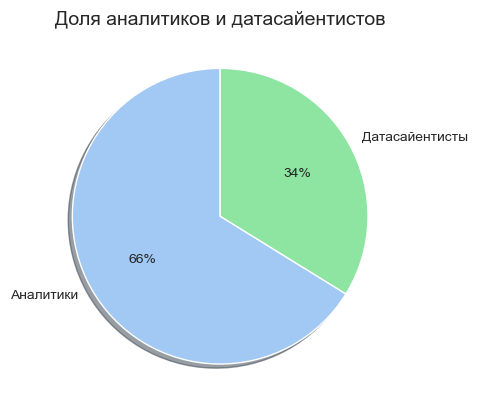

In [41]:
df = vacancies['name_type'].value_counts().reset_index()
labels = ['Аналитики', 'Датасайентисты']
fig, ax = plt.subplots()
ax.pie(df['count'], 
       labels=labels, 
       shadow=True, 
       startangle=90, 
       autopct='%1.f%%', 
       textprops={'fontsize': 10})
ax.set_title('Доля аналитиков и датасайентистов', fontsize=14)
ax.tick_params(labelsize=5)
plt.savefig('share.png')
plt.show()

Вакансий аналитиков почти в два с раза больше чем вакансий датасайентистов.

Общее количество вакансий аналитиков - 1801
Общее количество вакансий датасайентистов - 920


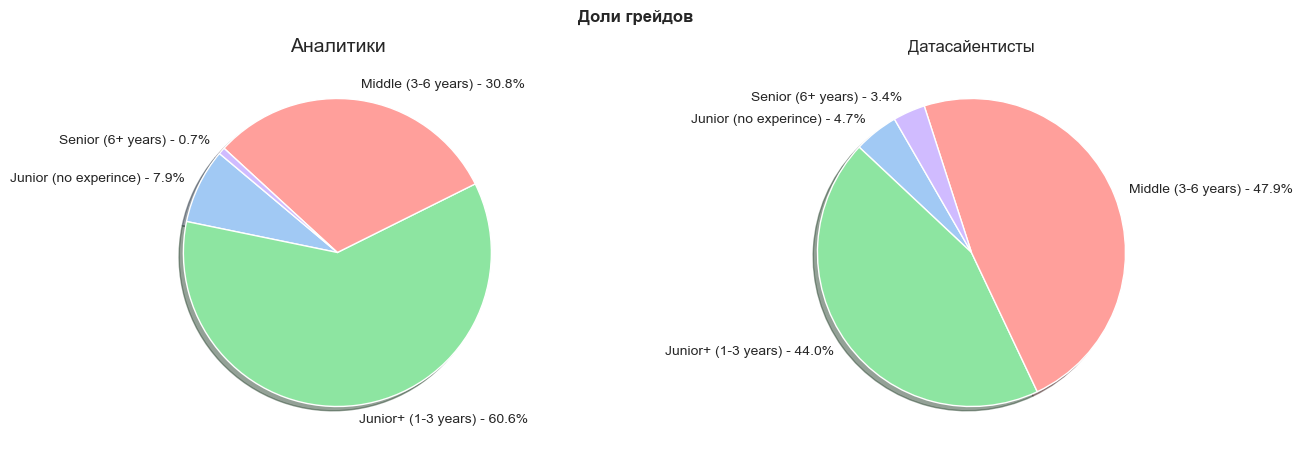

In [42]:
df_da = vacancies[vacancies['name_type'] == 'da']['experience'].value_counts().sort_index()
df_ds = vacancies[vacancies['name_type'] == 'ds']['experience'].value_counts().sort_index()

print(f'Общее количество вакансий аналитиков - {df_da.sum()}')
print(f'Общее количество вакансий датасайентистов - {df_ds.sum()}')

# Создаем фигуру и оси для двух подграфиков
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Круговая диаграмма для аналитиков
axes[0].pie(
      df_da, 
      labels=[lbl + f' - {value / df_da.sum():.1%}' for lbl, value in df_da.items()], 
      startangle=140, 
      textprops={'fontsize': 10},
      shadow=True
)
axes[0].set_title('Аналитики', fontsize=14)

# Круговая диаграмма для датасайентистов
axes[1].pie(
    df_ds, 
    labels=[lbl + f' - {value / df_ds.sum():.1%}' for lbl, value in df_ds.items()],
    startangle=120, 
    textprops={'fontsize': 10},
    shadow=True
    )
axes[1].set_title('Датасайентисты', fontsize=12)

# Добавляем общий заголовок для всех подграфиков
plt.suptitle('Доли грейдов', fontsize=12, fontweight='bold')
plt.savefig('share_experience.png')
# Отображаем график
plt.show()


Среди вакансий аналитиков - более половины вакансий (61%) с грейдом Junior+ (1-3 years), еще 31% - это вакансии уровня Middle (3-6 years). Среди вакансий датасайентистов тоже преобладают вакансии уровня Junior+ и Middle, но здесь больше вакансий уровня Middle (около 48%). Интересно, что среди датасайентистов больше вакансий для уровня Senior(6+ years). Cреди аналитиков наблюдается немного большая потребность в специалистах на уровне Junior без опыта по сравнению с датасайентистыми. Такое распределение может обуславливаться тем, что "вход" в профессию аналитиков проще, чем для датасайентистов. А аналитики с большим опытом работы - могут переквалифицироваться в датасайентистов.

## Топ городов по количеству вакансий

In [43]:
# Построение горизонтальных столбчатых диаграмм для двух категорий вакансий
# Функция создает две горизонтальные столбчатые диаграммы, отображающие топ-5 популярных значений 
# для указанного столбца в датасете вакансий, разделенных по категориям 'Аналитики данных' и 'Датасайентисты'.
def plot_top_popular_values(vacancies: pd.DataFrame, column: str, *, title: str, 
                            rus_feature: str, top_n: int = 5, da_shift: float = 165, 
                            ds_shift: float = 72, height: float = 4, top: float = 0.8, 
                            wspace: float = 0.83, lower: float = 0.2) -> None:
   
    # создаем основу для двух графиков и определяем размер
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(18, height)

    # данные для диаграмм
    data_da = vacancies.loc[vacancies.name_type == 'da', column].value_counts()
    data_da_share = data_da / data_da.sum()

    data_ds = vacancies.loc[vacancies.name_type == 'ds', column].value_counts()
    data_ds_share = data_ds / data_ds.sum()

    # построение диаграмм
    sns.barplot(x=data_da[:top_n], y=data_da.index[:top_n], ax=axes[0])
    sns.barplot(x=data_ds[:top_n], y=data_ds.index[:top_n], ax=axes[1])

    # текстовые метки для столбцов
    for i, val in enumerate(data_da_share.values[:top_n]):
        axes[0].text(da_shift, i + lower, f"{round(val*100, 1)}%", 
                     horizontalalignment='center', 
                     verticalalignment='bottom', 
                     fontdict={'fontweight':500, 'size':10, 'color': 'black'})

    for i, val in enumerate(data_ds_share.values[:top_n]):
        axes[1].text(ds_shift, i + lower, f"{round(val*100, 1)}%", 
                     horizontalalignment='center', 
                     verticalalignment='bottom', 
                     fontdict={'fontweight':500, 'size':10, 'color': 'black'})

    # заголовок и размер шрифта
    fig.suptitle(title, fontsize=16, fontweight="bold")
    # подписи
    axes[0].set_title('Аналитики данных', fontsize=14)
    axes[1].set_title('Датасайентисты', fontsize=14)
    axes[0].set_xlabel('количество наблюдений', fontsize=12)
    axes[1].set_xlabel('количество наблюдений', fontsize=12)
    axes[0].set_ylabel(rus_feature, fontsize=12)
    axes[1].set_ylabel(rus_feature, fontsize=12)
    plt.subplots_adjust(wspace=wspace, top=top)
    plt.grid(False)
    plt.savefig('city.png')
    plt.savefig('employer.png')

    # Отображаем график
    plt.show()

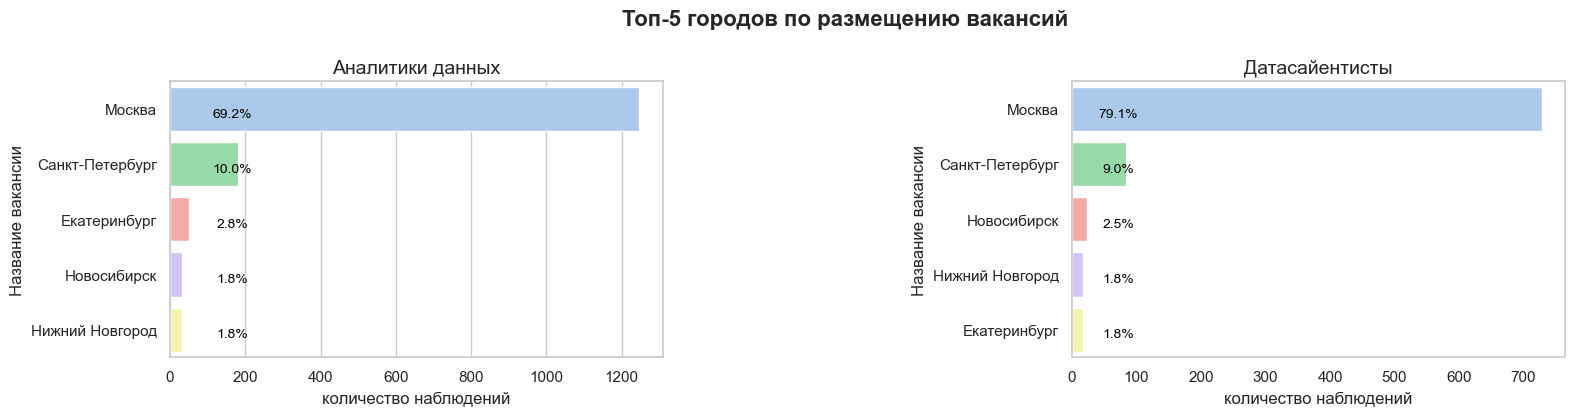

In [44]:
plot_top_popular_values(
    vacancies, 
    'area', 
    title='Топ-5 городов по размещению вакансий', 
    rus_feature='Название вакансии',
    top_n=5
)


Основная часть вакансий размещена в г. Москве, это характерно как для аналитиков, так и для датасайентистов. Соответственно дальнейший анализ по городам производить нецелесообразно. 

## Топ работодателей по количеству вакансий

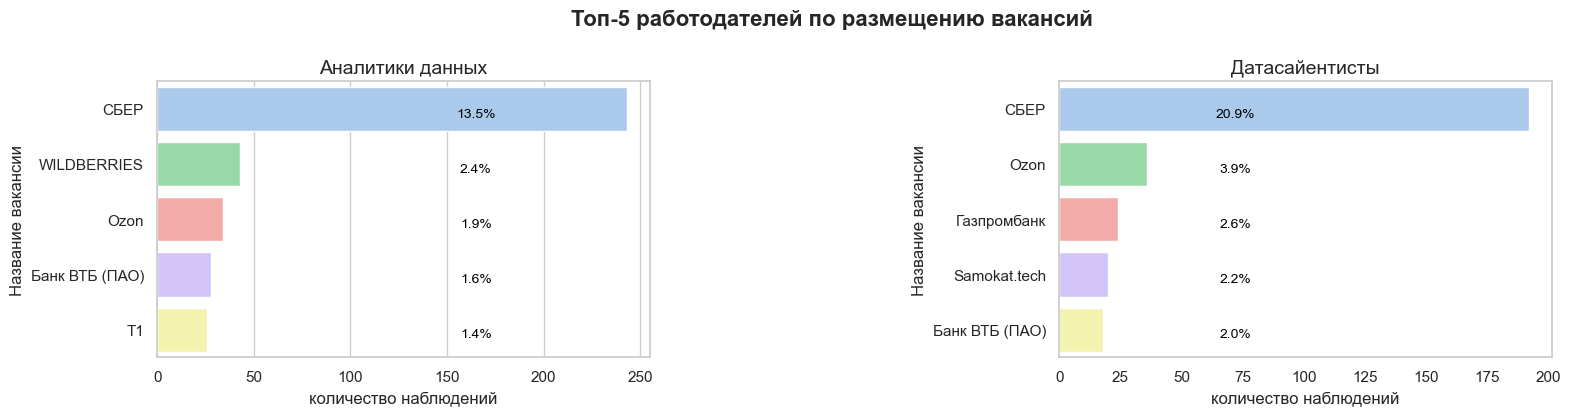

In [45]:

plot_top_popular_values(
    vacancies, 
    'employer', 
    title='Топ-5 работодателей по размещению вакансий', 
    rus_feature='Название вакансии',
    top_n=5
)


Сбер является лидером по кол-ву размещаемых вакансий, как для аналитиков (13,5%), так и для датасайентистов (21%). Вакансии Банка ВТБ и компании Т1 можно было бы объединить в 1 группу, т.к. это аффилированные компании, но они даже в сумме менее 5% от всех размещенных вакансий у аналитиков. 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

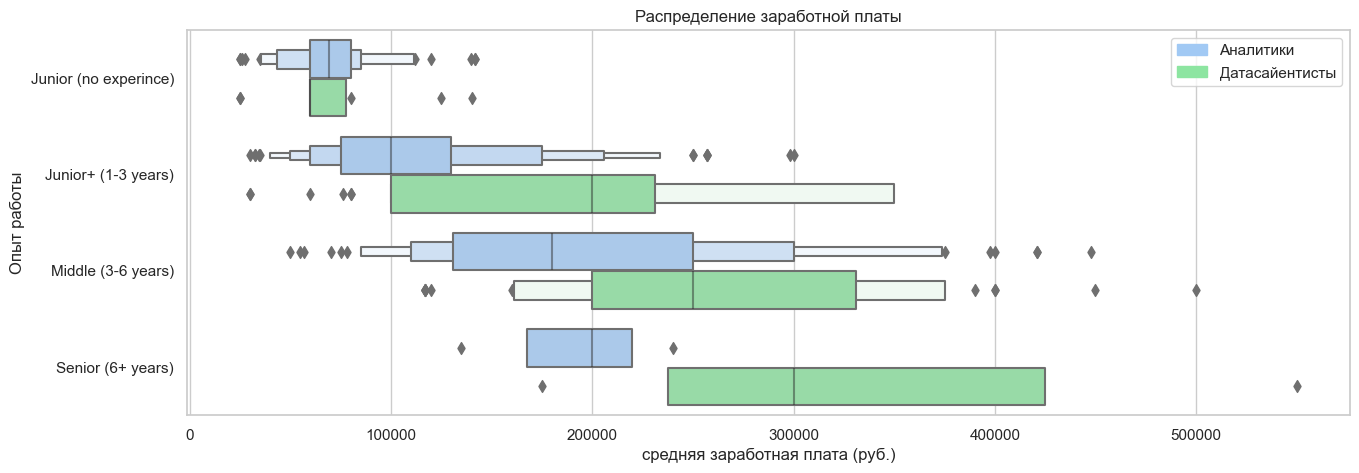

In [46]:
order = vacancies.groupby(['name_type', 'experience']).agg({'salary_avg': 'median'}).reset_index().iloc[:4]['experience']
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxenplot(data=vacancies, x='salary_avg', y='experience', hue='name_type', order=order, ax=ax)
ax.set_title('Распределение заработной платы', fontsize=12,)
ax.set_ylabel('Опыт работы')
ax.set_xlabel('средняя заработная плата (руб.)')


analyst_patch = mpatches.Patch(color = '#a1c9f4', label='Aналитики')
datascience_patch = mpatches.Patch(color = '#8de5a1',label='Датасайентисты')

plt.legend(handles=[analyst_patch, datascience_patch], loc='upper right')
plt.savefig('salary_avg.png')
plt.show()

Для начинающих специалистов без опыта и для экспертов с высоким уровнем квалификации информация разрозненная, поэтому нельзя делать вывод в этих категориях. Указанный уровень доходов аналитиков на уровнях junior+ и middle ниже, чем у датасайентистов с аналогичным опытом. Так, медианная зарплата аналитика на уровне junior+ составляет около 100 тыс. рублей, в то время как для датасайентистов этой же категории — более 200 тыс. рублей. Для специалистов middle уровня : медианная зарплата аналитика 200 тыс. рублей, тогда как у датасайентистов 300 тыс. рублей.

# Наиболее желаемые кандидаты на вакансии Аналитик данных и Специалист по Data Science

Исходя из представленных данных о количестве вакансий для каждой категории опыта работы в области аналитики данных (Аналитиков данных) и бизнес-аналитики (Бизнес-аналитиков), можно сделать следующие выводы:

В нашем датасете больше всего было представлено вакансий аналитиков, основной город размещения вакансии - Москва. Наибольшее число вакансий как для аналитиков, так и для сайнтистов предлагает СБЕР. Медианная заработная плата - 100 тыс. руб.

- Для аналитиков данных:
    Наиболее востребованной категорией опыта работы является Junior+ (1-3 years) - 60%.
    Второй по популярности уровень опыта работы - Middle (3-6 years) 31% вакансий.
    Интересно, что для аналитиков уровень Junior (no experience) более востребован (8%), чем у датасайентистов (5%). 
    А вот с уровнем Senior (6+ years) наоборот - у датасайентистов этот грейд запрашивается в 3% вакансий, тогда как у аналитиков всего 0,7% таких вакансий.
  
- Для дата сайентистов:
    Наибольшее количество вакансий предлагается для уровня Middle (3-6 years) - 48% размещенных вакансий.
    Уровень Junior+ (1-3 years) тоже востребован - 44% вакансий.

Для начинающих специалистов без опыта и для экспертов с высоким уровнем квалификации информация по уровню дохода разрозненная, поэтому нельзя делать вывод в этих категориях. Указанный уровень доходов аналитиков на уровнях junior+ и middle ниже, чем у датасайентистов с аналогичным опытом. Так, медианная зарплата аналитика на уровне junior+ составляет около 100 тыс. рублей, в то время как для датасайентистов этой же категории — более 200 тыс. рублей. Для специалистов middle уровня: медианная зарплата аналитика 200 тыс. рублей, тогда как у датасайентистов 300 тыс. рублей.

Наиболее востребованные скиллы для аналитиков и датасайентистов: Hard skills: sql, python (+pandas), power bi, excel. Soft skills: Аналитическое мышление, работа с документацией, коммуникация, часто встречается проактивность.

Наиболее востребованные скиллы аналитика данных и датасайентиста для различных грейдов:

- Для Junior (без опыта) и Junior+ (1-3 года опыта) как для Аналитика данных так и для дата сайентиста требования не сильно различаются: требуется sql, python, анализ данных. У датасайентистов чаще встречается требование умение работать с базами данных. При этом у датасайентистов дополнительно встречаются в требованиях знание статистики (в т.ч. мат. статистики) и знания по машинному обучению. Также у аналитиков чаще встречется в хард скиллах знание sql, а у датасайентистов больше популярен python. Ехсел у датасайентистов не сильно распростанен - это больше инструмент аналитика данных на начальных стажах.

- По софт скиллам различия практически не наблюдаются.

- Для более высококвалифицированных сотрудников Middle (3-6 лет опыта) и Senior (более 6 лет опыта) среди хард скилов помимо стандартных sql, python (+pandas), работой с базами данных появляется требование к знанию confluence - это пространство для командной работы. Также в софт скиллах для опытных сотрудников требуются навыки управления командой, подготовки и умения презентовать результаты. 
  

# Общие выводы:


Мы провели исследование вакансий представленных на сайте HH.ru по специальностям Data Science и Аналитик данных.

Целью проекта было выявить различия в предлагаемых вакансиях для Аналитиков данных и Специалистов по Data Science.

Мы проанализировали полученные 2 датасета - вакансии аналитиков и датасайентистов.
Для облегчения анализа 2 датасета были объединены в один.

Вакансии представлены за период с 13.02.2024 по 11.06.2024
Кол-во ваканий в динамике увеличивается к концу периода, что связано с закрытием более старых вакансий.

1. В процессе выполнения анализа данных выявлены следующие проблемы и ошибки в исходных данных:
    - Пропуски в данных: Обнаружены значительные пропуски в столбцах salary_from, salary_to, key_skills_from_key_skills_field, hard_skills_from_description, soft_skills_from_description
    - Пропуски были заполнены по средней ЗП между salary_from, salary_to. 
    - Были удалены явные дубликаты, появившиеся при объединении таблиц. 
    - Разделили навыки из столбца key_skills на хард и софт навыки, создали 2 новых столбца soft_skills и hard_skills.

2. Исходя из предоставленных данных, можно сделать следующие общие выводы:
    Кол-во вакансий аналитиков на рынке труда больше (66%), чем вакансий для датасайентистов (34%). 
    К датасайентистам предъявляется более углубленные знания по статистике, python b sql.
    Но во многих компаниях эти профессии очень сильно пересекаются, ведь Аналитика данных и Data Science являются разными этапами одного процесса.  - это видно из предъявляемых требований, очень часто они похожи или родственны.

    *Чем занимается Data Scientist*
    Специалисты по Data Science большую часть времени проводят за очисткой данных: подготавливают их для моделей и алгоритмов, обнаруживающих скрытые закономерности, которые не может выявить человек. Данные клиента загружают в модель и заставляют её строить прогнозы, на основании которых потом принимаются ключевые решения в бизнесе. Например, какой бюджет выделить на производство новой линейки товаров, какой процент выручки получит компания от их реализации и за какие сроки.
   
    *Чем занимается Аналитик данных*
   
     Главное отличие аналитика данных от специалиста по Data Science в том, что аналитик не владеет навыками машинного обучения, поэтому сам обрабатывает данные. Например, собирает у маркетологов все данные по прошлым рассылкам компании и сегментирует пользователей по возрасту, полу, локации, предпочтениям. Затем выявляет в данных закономерности и влияние параметров друг на друга. 

    Аналитик занимается ретроанализом, то есть анализом прошлого поведения пользователей, и на его основе ищет связи между эффективностью рассылки и показателями компании, предлагает рекомендации. Для специалиста по Data Science и для аналитика критически важны продвинутые знания доменной области — индустрии, в которой они работают, будь то ретейл, промышленность или финансы. 

    Аналитика данных и Data Science помогают быстро и правильно принимать решения только при условии, что специалист понимает, как выбор влияет на результаты. Поэтому он должен уметь сочетать инструменты машинного обучения с пониманием причинно-следственных связей, стоящих за данными.

    - *Требуемые Hard Skills*:
   Знание SQL, Python и Excel является важным как для аналитиков данных, так и для датасайентистов. Дополнительные навыки, знание статистики, умение работать с базами данных и машинного обучения характерны больше для датасайентистов.
   - *Требуемые Soft Skills*:
   Аналитическое мышление, способность работать с большим объемом информации и коммуникативные навыки остаются важными для всех уровней грейда. С увеличением опыта работы всё больше требуются навыки управления командой, подготовки и умение презентовать результаты.
    - *Требуемый опыт работы*:
   Вакансии с более низким уровнем опыта (Junior и Junior+) встречаются чаще всего как для аналитиков данных, так и для бизнес-аналитиков. Для более опытных кандидатов (Middle и Senior) количество вакансий значительно меньше.
    - *ТОП работодателей*:
   СБЕР в топе работодателей для различных уровней грейда - как для аналитиков данных, так и для датасайентистов. Это указывает на его ведущее положение на рынке и привлекательность для специалистов, большой объем различных проектов.
    - *Уровень дохода*: Во многих вакансиях уровень дохода не указан. Зарплаты значительно увеличиваются с уровнем грейда. Медианная зарплата - 100 тыс. руб. Уровень дохода датасайентистов выше дохода аналитиков, особенно это заметно на более высоких грейдах. 

**Рекомендация:**  На сайте HH.ru при размещении вакансий необходимо ограничить возможность введения навыков от руки, это позволит избежать ошибок и дублирования данных. Требуется привести к единому написанию все навыки - возможно, дать возможность пользователю выбирать навыки из раскрывающегося списка. При единообразном написании будет легче находить вакансию пользователям сервиса.
